In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings
from qiskit_metal.qlibrary.qubits.transmon_cross import TransmonCross
from qiskit_metal.qlibrary.qubits.transmon_cross_fl import TransmonCrossFL
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond
from qiskit_metal.qlibrary.terminations.launchpad_wb_coupled import LaunchpadWirebondCoupled
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder

# Physical Parameters
 
## Qubit Physical Parameters

In [3]:
def set_physical_parameter(value, units):
    if value == 0:
        return 0
    else:
        return str(value)+units

In [4]:
cross_gap = 30
cross_width = 30
cross_length = 240
L_j = 10
C_j = 0

## Claw Physical Parameters

In [5]:
claw_length = 150
claw_width = 7
claw_gap = 6

In [6]:
claw_params = dict(connector_location = '180',
                 claw_length =  set_physical_parameter(claw_length, "um"),
                 claw_width = set_physical_parameter(claw_width, "um"),
                 claw_gap =  set_physical_parameter(claw_gap, "um"),
                 ground_spacing = '10um')

## Chip Parameters

In [7]:
chip_x = 2
chip_y = 2

In [8]:
design = designs.DesignPlanar({}, True)
design.delete_all_components()

design.chips.main.size['size_x'] = set_physical_parameter(chip_x, "mm")
design.chips.main.size['size_y'] = set_physical_parameter(chip_y, "mm")

In [9]:
gui = MetalGUI(design)

# Qubit on GUI 

In [10]:
TransmonCrossFL.get_template_options(design)

{'pos_x': '0.0um',
 'pos_y': '0.0um',
 'orientation': '0.0',
 'chip': 'main',
 'layer': '1',
 'connection_pads': {},
 '_default_connection_pads': {'connector_type': '0',
  'claw_length': '30um',
  'ground_spacing': '5um',
  'claw_width': '10um',
  'claw_gap': '6um',
  'connector_location': '0'},
 'cross_width': '20um',
 'cross_length': '200um',
 'cross_gap': '20um',
 'make_fl': True,
 'fl_options': {'t_top': '15um',
  't_offset': '0um',
  't_inductive_gap': '3um',
  't_width': '5um',
  't_gap': '3um'},
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

In [11]:
transmon_options = dict(
        chip = 'main',
        pos_x = '-1mm',
        cross_gap = set_physical_parameter(cross_gap, "um"), 
        cross_width = set_physical_parameter(cross_width, "um"), 
        cross_length = set_physical_parameter(cross_length, "um"), 
        hfss_inductance = set_physical_parameter(L_j, "nH"),
        hfss_capacitance = set_physical_parameter(C_j, "fF"),
        q3d_inductance = set_physical_parameter(L_j, "nH"),
        q3d_capacitance = set_physical_parameter(C_j, "fF"),
        connection_pads=dict(
        claw = claw_params,
        )
)


In [12]:
q1 = TransmonCrossFL(design, 'Q1', options = transmon_options)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)

  arr = construct_1d_object_array_from_listlike(values)



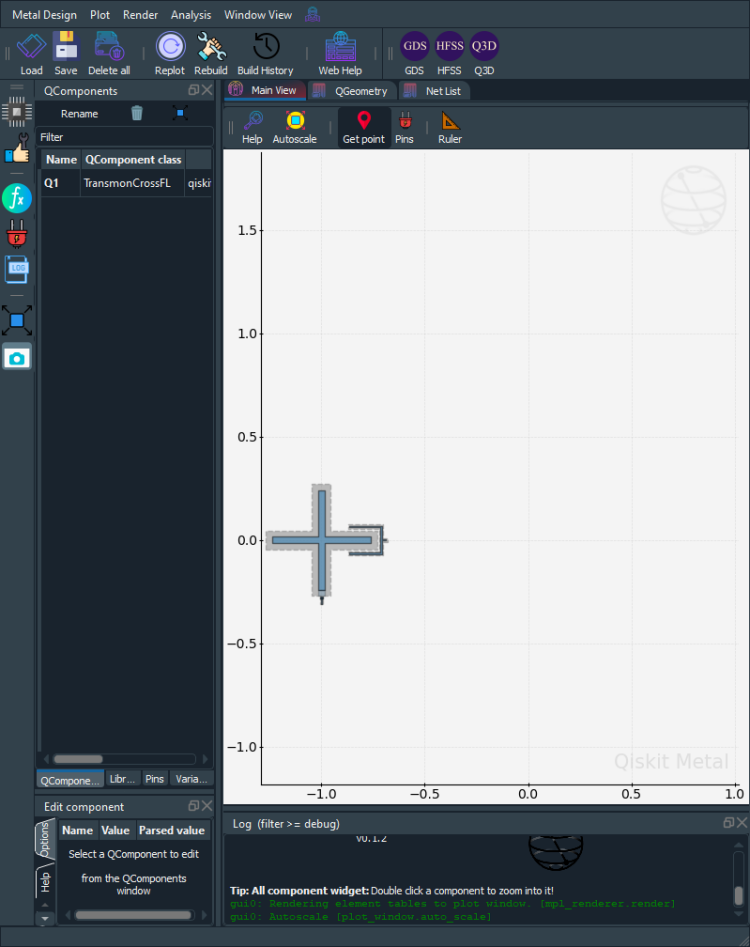

In [13]:
gui.rebuild()
gui.autoscale()
gui.screenshot()

# EPR Analysis of Qubit with Claw

In [ ]:
from qiskit_metal.analyses.quantization import EPRanalysis

In [ ]:
eig_1qb = EPRanalysis(design, "hfss")

In [ ]:
hfss1 = eig_1qb.sim.renderer

## Simulation Set Up

In [ ]:
eig_1qb.sim.setup

In [ ]:
eig_1qb.sim.setup.max_passes = 60 # mesh setting
eig_1qb.sim.setup.max_delta_f = 0.05
eig_1qb.sim.setup.n_modes = 1 # number of division of the chip (qubit + claw)
eig_1qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_1qb.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_1qb.sim.setup.reuse_selected_design = False
eig_1qb.sim.setup.reuse_setup = False
eig_1qb.sim.setup.min_freq_ghz = 2 #GHz

eig_1qb.sim.renderer.options

In [14]:
resistance = 50 #Ohms #signal path R

In [ ]:
eig_1qb.sim.run(name="OCS_qubit",
                components=[ 'Q1'],  open_terminations=[],  port_list=[("Q1","claw", resistance)], box_plus_buffer = True)

## Simulation Outputs

In [15]:
%matplotlib inline

In [ ]:
eig_1qb.sim.plot_convergences()

In [ ]:
eig_1qb.sim.convergence_f

### Qubit Frequency

In [16]:
import numpy as np

In [ ]:
freqs = eig_1qb.sim.convergence_f["re(Mode(1)) [g]"].values
freqs = freqs[~np.isnan(freqs)]

In [ ]:
qubit_freq = freqs[-1]
qubit_freq

`hfss1.start() # restart HFSS`

# EPR Again

In [16]:
from qiskit_metal.analyses.quantization import EPRanalysis

eig_qb = EPRanalysis(design, "hfss")

In [17]:
hfss = eig_qb.sim.renderer
hfss.start()


INFO 10:10PM [connect_project]: Connecting to Ansys Desktop API...
INFO 10:10PM [load_ansys_project]: 	Opened Ansys App
INFO 10:10PM [load_ansys_project]: 	Opened Ansys Desktop v2021.1.0
INFO 10:10PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    D:/lfl/Documents/Ansoft/
	Project:   Project15
INFO 10:10PM [connect_design]: 	Opened active design
	Design:    TransmonQubit [Solution type: Eigenmode]
INFO 10:10PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 10:10PM [connect]: 	Connected to project "Project15" and design "TransmonQubit" 😀 



True

In [20]:
hfss.activate_ansys_design("TransmonQubit_2", 'eigenmode')  # use new_ansys_design() to force creation of a blank design

10:11PM 30s WARNING [activate_ansys_design]: The design_name=TransmonQubit_2 was not in active project.  Designs in active project are: 
['TransmonQubit'].  A new design will be added to the project.  
INFO 10:11PM [connect_design]: 	Opened active design
	Design:    TransmonQubit_2 [Solution type: Eigenmode]
WARNING 10:11PM [connect_setup]: 	No design setup detected.
WARNING 10:11PM [connect_setup]: 	Creating eigenmode default setup.
INFO 10:11PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


In [21]:
hfss.render_design(
                selection=['Q1'],  open_pins=[],  port_list=[("Q1","claw", resistance)], box_plus_buffer = True)

In [ ]:
# Analysis properties
setup = hfss.pinfo.setup
setup.passes = 17
print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

pinfo = hfss.pinfo
pinfo.design.set_variable('Lj', '10 nH')
pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

INFO 10:12PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 1
Number of simulation passes              = 17
Convergence freq max delta percent diff  = 0.1



In [ ]:
eig_qb.sim.convergence_t, eig_qb.sim.convergence_f, _ = hfss.get_convergences()
eig_qb.sim.plot_convergences()

In [ ]:
pinfo = hfss.pinfo
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj',
                             'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied
pinfo.dissipative['dielectrics_bulk'] = ['main'] # Dissipative elements: specify

In [ ]:
import pyEPR as epr

eprd = epr.DistributedAnalysis(pinfo)

In [ ]:
ℰ_elec = eprd.calc_energy_electric()
ℰ_elec_substrate = eprd.calc_energy_electric(None, 'main')
ℰ_mag = eprd.calc_energy_magnetic()

print(f"""
ℰ_elec_all       = {ℰ_elec}
ℰ_elec_substrate = {ℰ_elec_substrate}
EPR of substrate = {ℰ_elec_substrate / ℰ_elec * 100 :.1f}%

ℰ_mag    = {ℰ_mag}
""")


In [ ]:
ℰ_elec_substrate / ℰ_mag

In [ ]:
eprd.do_EPR_analysis()


In [ ]:

# 4a. Perform Hamiltonian spectrum post-analysis, building on mw solutions using EPR
epra = epr.QuantumAnalysis(eprd.data_filename)



In [ ]:
sim_info = epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 7)

In [ ]:
import pandas as pd

df = pd.DataFrame(sim_info, columns=sim_info.keys())
df

In [ ]:
EjEc_ratio = float(epra.get_Ejs('0')) / float(epra.get_Ecs('0'))
EjEc_ratio